In [12]:
import numpy as np
from matplotlib import pyplot as plt

from pyloki.config import ParamLimits, PulsarSearchConfig
from pyloki.core.taylor import generate_branching_pattern
from pyloki.detection import thresholding
from pyloki.ffa import DynamicProgramming
from pyloki.periodogram import PruningStatsPlotter, ScatteredPeriodogram
from pyloki.prune import prune_dyp_tree
from pyloki.simulation.pulse import PulseSignalConfig


tobs = 2147.483648


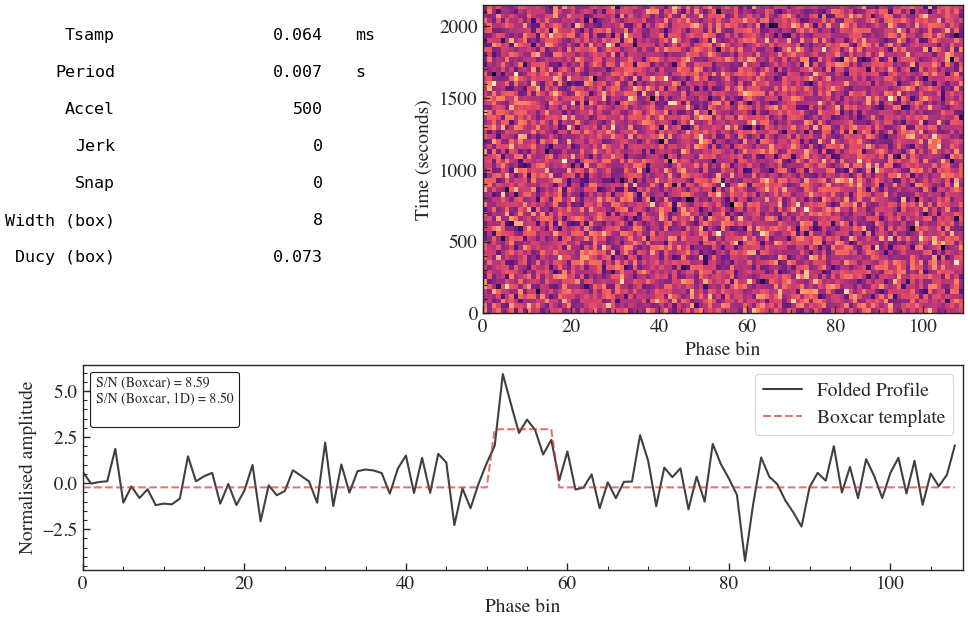

In [13]:
pulsar_period = 0.007
dt = 64e-6
accel = 500         
nsamps = 2**25
mod_kwargs = {"acc": accel}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=8.5, ducy=0.1,
                        mod_kwargs=mod_kwargs)
print(f"tobs = {cfg.tobs}")
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [14]:
tol_bins = 1 #cfg.tol_bins
fold_bins = 64 #cfg.fold_bins
#p = ParamLimits.from_upper([accel, cfg.freq], (-accel * 3, accel * 3), cfg.tobs)
p = ParamLimits.from_taylor((140.0, 145.0), (-1500.0, 1500.0) )
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 8192
bseg_ffa = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, bseg_ffa=bseg_ffa, prune_poly_order=2, ducy_max=0.2, wtsp=1.5, use_fft_shifts=True)
dyp = DynamicProgramming(tim_data, search_cfg)
dyp.initialize()
dyp.execute()

Param limits: [(-1500.0, 1500.0), (140.0, 145.0)]


2025-06-12 13:00:21 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [3.76082279e+06 1.19209290e-01]

2025-06-12 13:00:22 INFO     - pyloki.ffa - ffa level:  0, leaves: 5.36, fold dims: (8192, 1, 41, 2, 33)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 0.358 seconds

Output()

                    INFO     - pyloki.ffa - ffa level:  1, leaves:  6.38, fold dims: (4096, 1, 83, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  2, leaves:  7.38, fold dims: (2048, 1, 167, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  3, leaves:  8.39, fold dims: (1024, 1, 335, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  4, leaves:  9.39, fold dims: (512, 1, 671, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  5, leaves: 10.39, fold dims: (256, 1, 1342, 2, 33)

2025-06-12 13:00:23 INFO     - pyloki.ffa - ffa level:  6, leaves: 12.98, fold dims: (128, 3, 2684, 2, 33)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [9.18169626e+02 1.86264515e-03]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 0.995 seconds

In [15]:
branching_pattern = generate_branching_pattern(dyp.param_arr, dyp.dparams_limited, dyp.cfg.param_limits, dyp.cfg.tseg_ffa, dyp.nsegments - 1,
                                               dyp.cfg.nbins, dyp.cfg.tol_bins, 0)
branching_pattern

array([4, 9, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

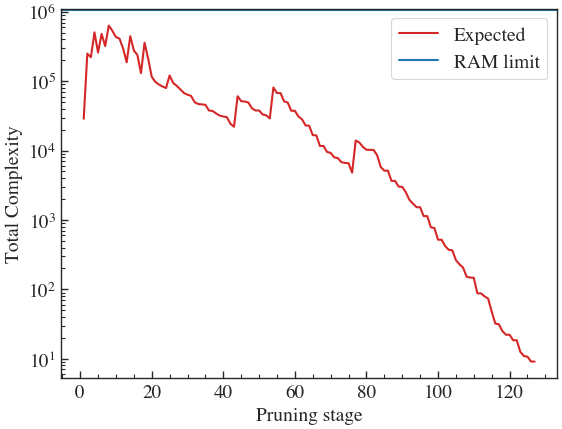

In [16]:
thresholds = np.array([2.1, 2. , 2.2, 2.4, 2.8, 2.9, 3. , 3.1, 3. , 3. , 2.8, 3.1, 3.3,
       3.3, 3.5, 3.4, 3.7, 3.5, 3.8, 4. , 3.9, 3.8, 3.7, 3.6, 4.1, 4.1,
       4. , 4. , 4. , 3.9, 3.8, 4. , 3.9, 3.7, 3.6, 3.9, 3.7, 3.8, 3.8,
       3.7, 3.6, 3.9, 3.9, 3.9, 4. , 3.8, 3.8, 4. , 4. , 3.7, 4. , 3.9,
       4. , 4. , 4.1, 3.7, 4.2, 4.1, 4.3, 4. , 4.3, 4.3, 4.4, 4.2, 4.5,
       4.3, 4.6, 4.1, 4.6, 4.5, 4.6, 4.5, 4.6, 4.5, 4.4, 4.7, 4.6, 4.6,
       4.7, 4.7, 4.4, 4.4, 4.7, 4.9, 4.9, 4.7, 5. , 4.7, 5. , 4.8, 5. ,
       5.1, 5.1, 5.1, 4.9, 5.2, 4.9, 5.3, 5.2, 5.4, 5. , 5.4, 5.4, 5.3,
       5.5, 5.5, 5.5, 5.6, 5.5, 5.4, 5.7, 5.3, 5.6, 5.6, 5.8, 5.9, 5.8,
       5.9, 5.9, 5.5, 5.9, 5.5, 6. , 6. , 5.9, 6. , 5.6])
thresh_state = thresholding.evaluate_scheme(thresholds, branching_pattern, ref_ducy=0.1, nbins=64,
                                            ntrials=1024, snr_final=8.5, ducy_max=0.2, wtsp=1.5)
x = np.arange(1, len(branching_pattern) + 1)
plt.semilogy(x, np.array(thresh_state.get_info("complexity")) * dyp.nparam_vol, label="Expected", c="tab:red")
plt.axhline(2**20, label="RAM limit", c="tab:blue")
plt.xlabel("Pruning stage")
plt.ylabel("Total Complexity")
plt.legend()
plt.show()

In [17]:
result_file = prune_dyp_tree(dyp, thresholds, n_runs=8, max_sugg=2**20, outdir="accel_test/", file_prefix="test_accel",
                             kind="taylor", n_workers=8)

2025-06-12 13:00:23 INFO     - pyloki.prune - Starting Pruning for 8 runs, with 8 workers

Output()

2025-06-12 13:00:30 INFO     - worker_000 - Initializing pruning run with ref segment: 0

                    INFO     - worker_000 - prune_initialize finished, Elapsed time: 0.052 seconds

2025-06-12 13:00:31 INFO     - worker_018 - Initializing pruning run with ref segment: 18

2025-06-12 13:00:32 INFO     - worker_018 - prune_initialize finished, Elapsed time: 0.040 seconds

2025-06-12 13:00:34 INFO     - worker_036 - Initializing pruning run with ref segment: 36

                    INFO     - worker_036 - prune_initialize finished, Elapsed time: 0.045 seconds

2025-06-12 13:00:37 INFO     - worker_054 - Initializing pruning run with ref segment: 54

                    INFO     - worker_054 - prune_initialize finished, Elapsed time: 0.049 seconds

2025-06-12 13:00:40 INFO     - worker_072 - Initializing pruning run with ref segment: 72

                    INFO     - worker_072 - prune_initialize finished, Elapsed time: 0.100 seconds

2025-06-12 13:00:43 INFO     - worker_090 - Initializing pruning run with ref segment: 90

                    INFO     - worker_090 - prune_initialize finished, Elapsed time: 0.054 seconds

2025-06-12 13:00:47 INFO     - worker_108 - Initializing pruning run with ref segment: 108

                    INFO     - worker_108 - prune_initialize finished, Elapsed time: 0.053 seconds

2025-06-12 13:00:51 INFO     - worker_127 - Initializing pruning run with ref segment: 127

2025-06-12 13:00:52 INFO     - worker_127 - prune_initialize finished, Elapsed time: 0.060 seconds

2025-06-12 13:01:08 INFO     - worker_018 - Pruning run complete for ref segment: 18

                    INFO     - worker_018 - Pruning stats: Score: 6.72, Leaves: 3.17

                    INFO     - worker_018 - Pruning time: Total: 24.7s (score: 44% | shift_add: 34% | threshold: 9%
                             | branch: 7%)

2025-06-12 13:01:10 INFO     - worker_000 - Pruning run complete for ref segment: 0

                    INFO     - worker_000 - Pruning stats: Score: 6.63, Leaves: 2.00

                    INFO     - worker_000 - Pruning time: Total: 28.2s (score: 54% | shift_add: 28% | threshold: 7%
                             | branch: 6%)

2025-06-12 13:01:15 INFO     - worker_036 - Pruning run complete for ref segment: 36

                    INFO     - worker_036 - Pruning stats: Score: 6.56, Leaves: 2.32

                    INFO     - worker_036 - Pruning time: Total: 28.6s (score: 53% | shift_add: 29% | threshold: 8%
                             | branch: 5%)

2025-06-12 13:01:20 INFO     - worker_072 - Pruning run complete for ref segment: 72

                    INFO     - worker_072 - Pruning stats: Score: 6.62, Leaves: 2.58

                    INFO     - worker_072 - Pruning time: Total: 28.2s (score: 54% | shift_add: 29% | threshold: 7%
                             | branch: 5%)

2025-06-12 13:01:22 INFO     - worker_054 - Pruning run complete for ref segment: 54

                    INFO     - worker_054 - Pruning stats: Score: 6.85, Leaves: 4.58

                    INFO     - worker_054 - Pruning time: Total: 32.4s (score: 54% | shift_add: 28% | threshold: 7%
                             | branch: 5%)

2025-06-12 13:01:25 INFO     - worker_090 - Pruning run complete for ref segment: 90

                    INFO     - worker_090 - Pruning stats: Score: 8.15, Leaves: 3.81

                    INFO     - worker_090 - Pruning time: Total: 29.3s (score: 54% | shift_add: 28% | threshold: 8%
                             | branch: 5%)

2025-06-12 13:01:28 INFO     - worker_108 - Pruning run complete for ref segment: 108

                    INFO     - worker_108 - Pruning stats: Score: 6.75, Leaves: 3.58

                    INFO     - worker_108 - Pruning time: Total: 28.6s (score: 54% | shift_add: 28% | threshold: 8%
                             | branch: 5%)

2025-06-12 13:01:31 INFO     - worker_127 - Pruning run complete for ref segment: 127

                    INFO     - worker_127 - Pruning stats: Score: 6.74, Leaves: 3.00

                    INFO     - worker_127 - Pruning time: Total: 28.7s (score: 55% | shift_add: 28% | threshold: 7%
                             | branch: 5%)

2025-06-12 13:01:32 INFO     - pyloki.prune - Pruning complete. Results saved to                                   
                             accel_test/test_accel_pruning_nstages_128_results.h5

In [18]:
pgram = ScatteredPeriodogram.load(result_file)
print(f"True params, a: {cfg.mod_kwargs["acc"]:.3f}, f: {cfg.freq:.10f}")
print(pgram.get_summary_cands(10, run_id=None))

True params, a: 500.000, f: 142.8571428571
Top candidates:
dparams: daccel: 0.1049576619, dfreq: 2.299561913e-05
Run: 090_06, S/N: 8.15, accel: 499.52, freq: 142.857126
Run: 090_06, S/N: 8.07, accel: 499.41, freq: 142.857125
Run: 090_06, S/N: 7.89, accel: 499.62, freq: 142.857127
Run: 090_06, S/N: 7.63, accel: 499.52, freq: 142.857149
Run: 090_06, S/N: 7.29, accel: 499.31, freq: 142.857171
Run: 090_06, S/N: 7.10, accel: 499.41, freq: 142.857148
Run: 090_06, S/N: 7.01, accel: 499.31, freq: 142.857148
Run: 090_06, S/N: 6.92, accel: 499.20, freq: 142.857170
Run: 090_06, S/N: 6.90, accel: 499.41, freq: 142.857171
Run: 054_04, S/N: 6.85, accel: -194.64, freq: 140.456761


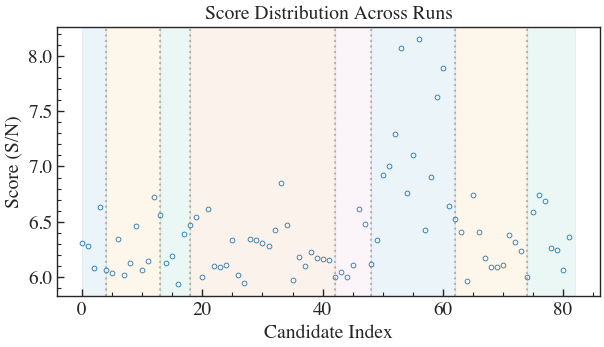

In [19]:
pgram.plot_scores(kind="scatter", run_id=None)
plt.show()

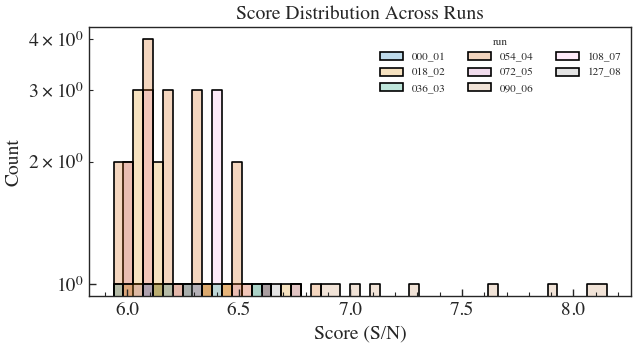

In [20]:
pgram.plot_scores(kind="hist", run_id=None)
plt.show()

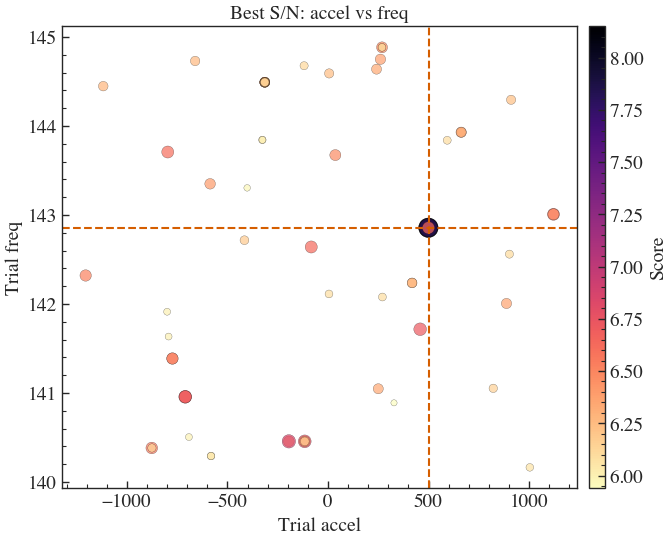

In [21]:
pgram.plot_correlation("accel", "freq", true_values={"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq}, run_id=None)
plt.show()

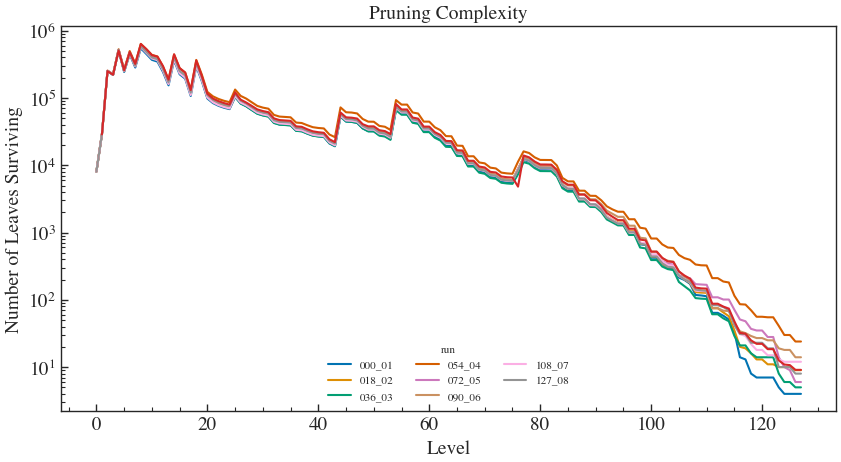

In [22]:
pstats = PruningStatsPlotter.load(result_file)
fig = pstats.plot_level_stats(run_id=None)
x = np.arange(1, len(branching_pattern) + 1)
ax_list = fig.axes
ax_list[0].plot(x, np.array(thresh_state.get_info("complexity")) * dyp.nparam_vol, label="Expected", c="tab:red")
plt.show()